<a href="https://colab.research.google.com/github/smmaskarim/Project_DataScience/blob/main/Statistics_Analysis_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset description
mpg: Miles per gallon (fuel efficiency)

cyl: Number of cylinders

disp: Displacement (cu.in.)

hp: Gross horsepower

drat: Rear axle ratio

wt: Weight (1000 lbs)

qsec: 1/4 mile time (seconds)

vs: Engine type (0 = V-shaped, 1 = straight)

am: Transmission (0 = automatic, 1 = manual)

gear: Number of forward gears

carb: Number of carburetors

In [ ]:
# check data overview
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


### Checking data type

In [ ]:
# check data structure
str(mtcars)


'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


### Convert applicable column for categorical data

In [ ]:
mtcars$cyl <- factor(mtcars$cyl)
mtcars$vs  <- factor(mtcars$vs, labels = c("V-shaped", "Straight"))
mtcars$am  <- factor(mtcars$am, labels = c("Automatic", "Manual"))
mtcars$gear <- factor(mtcars$gear)
mtcars$carb <- factor(mtcars$carb)

str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : Factor w/ 3 levels "4","6","8": 2 2 1 2 3 2 3 1 1 2 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : Factor w/ 2 levels "V-shaped","Straight": 1 1 2 2 1 2 1 2 2 2 ...
 $ am  : Factor w/ 2 levels "Automatic","Manual": 2 2 2 1 1 1 1 1 1 1 ...
 $ gear: Factor w/ 3 levels "3","4","5": 2 2 2 1 1 1 1 2 2 2 ...
 $ carb: Factor w/ 6 levels "1","2","3","4",..: 4 4 1 1 2 1 4 2 2 4 ...


### Descriptive Statistics

In [ ]:
summary(mtcars)

      mpg        cyl         disp             hp             drat      
 Min.   :10.40   4:11   Min.   : 71.1   Min.   : 52.0   Min.   :2.760  
 1st Qu.:15.43   6: 7   1st Qu.:120.8   1st Qu.: 96.5   1st Qu.:3.080  
 Median :19.20   8:14   Median :196.3   Median :123.0   Median :3.695  
 Mean   :20.09          Mean   :230.7   Mean   :146.7   Mean   :3.597  
 3rd Qu.:22.80          3rd Qu.:326.0   3rd Qu.:180.0   3rd Qu.:3.920  
 Max.   :33.90          Max.   :472.0   Max.   :335.0   Max.   :4.930  
       wt             qsec              vs             am     gear   carb  
 Min.   :1.513   Min.   :14.50   V-shaped:18   Automatic:19   3:15   1: 7  
 1st Qu.:2.581   1st Qu.:16.89   Straight:14   Manual   :13   4:12   2:10  
 Median :3.325   Median :17.71                                5: 5   3: 3  
 Mean   :3.217   Mean   :17.85                                       4:10  
 3rd Qu.:3.610   3rd Qu.:18.90                                       6: 1  
 Max.   :5.424   Max.   :22.90          

In [ ]:
descriptive_stats <- function(df) {
  sapply(df[sapply(df, is.numeric)], function(x) {
    c(
      Count  = sum(!is.na(x)),
      Mean   = mean(x, na.rm = TRUE),
      SD     = sd(x, na.rm = TRUE),
      Min    = min(x, na.rm = TRUE),
      Q1     = quantile(x, 0.25, na.rm = TRUE),
      Median = median(x, na.rm = TRUE),
      Q3     = quantile(x, 0.75, na.rm = TRUE),
      Max    = max(x, na.rm = TRUE)
    )
  }) |> round(2)
}

# Run for iris
descriptive_stats(mtcars)



,mpg,disp,hp,drat,wt,qsec
Count,32.00,32.00,32.00,32.00,32.00,32.00
Mean,20.09,230.72,146.69,3.60,3.22,17.85
SD,6.03,123.94,68.56,0.53,0.98,1.79
Min,10.40,71.10,52.00,2.76,1.51,14.50
Q1.25%,15.43,120.83,96.50,3.08,2.58,16.89
Median,19.20,196.30,123.00,3.70,3.33,17.71
Q3.75%,22.80,326.00,180.00,3.92,3.61,18.90
Max,33.90,472.00,335.00,4.93,5.42,22.90


### Normality testing

In [ ]:
shapiro_numeric <- function(df, alpha = 0.05) {
  num_df <- df[sapply(df, is.numeric)]
  stats <- sapply(num_df, function(x) {
    if (length(unique(x)) < 3) {
      return(c(p.value = NA, Decision = NA))
    }
    test <- shapiro.test(x)
    decision <- ifelse(test$p.value < alpha, "Not Normal", "Normal")
    c(p.value = round(test$p.value, 4), Decision = decision)
  })
  stats
}

# Example with iris
shapiro_numeric(mtcars)


,mpg,disp,hp,drat,wt,qsec
p.value,0.1229,0.0208,0.0488,0.1101,0.0927,0.5935
Decision,Normal,Not Normal,Not Normal,Normal,Normal,Normal


### if p-value from shapiro-wilk test is greater than 0.05, then the data is normality distributed.
## if not, we need to run non-parametric test:  Mann-Whitney U test

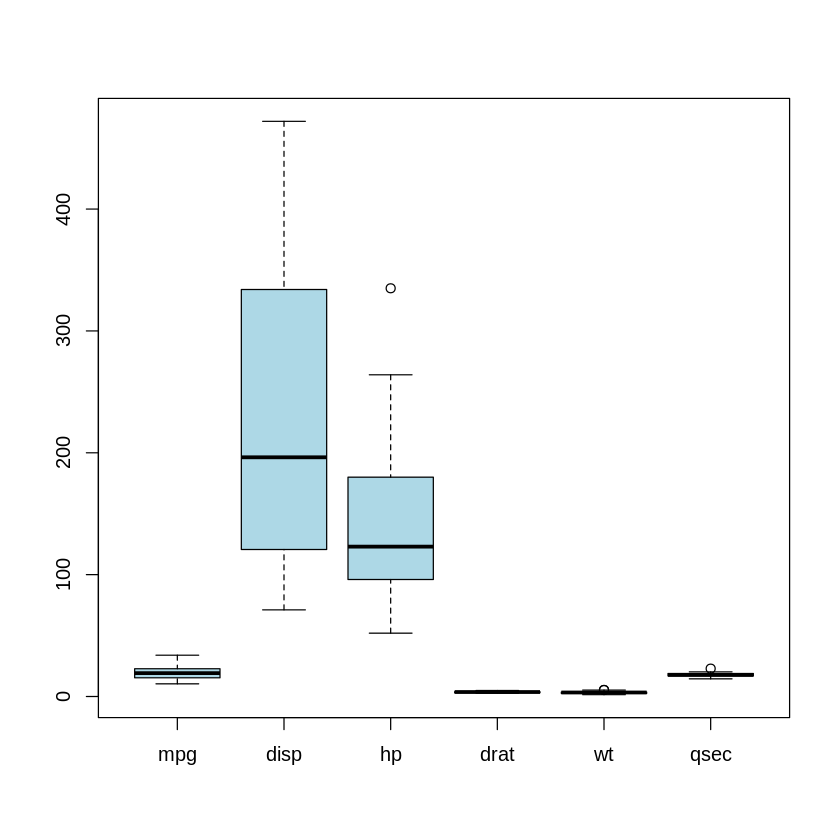

In [ ]:
# To check data distribution
num_df <- mtcars[sapply(mtcars, is.numeric)]
boxplot(num_df,  col = "lightblue")



# Unpaired t-test
If normality is violated but sample size is large (>30 per group), the t-test is robust due to the Central Limit Theorem.



# Key Points

## 1. Groups must be independent

  No observation in one group should influence the other.

  Example: Comparing the average mpg of automatic vs manual cars in mtcars.

  ## 2. Dependent variable must be continuous

  Example: mpg, weight, height.

## 3. Normality assumption

   Each group’s dependent variable should be approximately normally distributed.

   Can check using:

   Shapiro-Wilk test (shapiro.test())

   Q-Q plots

## 4. Equal variances (homoscedasticity)

  The two groups should have similar variances.

  Can test with Levene’s test or F-test.

If variances are unequal, use Welch’s t-test.

In [ ]:
#install.packages("car")
library(car)
# For equal variance test, we need to run levenTest
# mpg by transmission type
leveneTest(mpg ~ factor(am), data = mtcars)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,4.187626,0.04957067
,30,NA,NA


### Check for the p-value (Pr(>F)):

If p > 0.05 → Fail to reject H₀ → Variances are approximately equal → OK for standard t-test

If p < 0.05 → Reject H₀ → Variances are unequal → Use Welch’s t-test

# Perform t-test

In [ ]:
t.test(mpg ~ factor(am), data = mtcars, var.equal = TRUE)



	Two Sample t-test

data:  mpg by factor(am)
t = -4.1061, df = 30, p-value = 0.000285
alternative hypothesis: true difference in means between group Automatic and group Manual is not equal to 0
95 percent confidence interval:
 -10.84837  -3.64151
sample estimates:
mean in group Automatic    mean in group Manual 
               17.14737                24.39231 


### Conclusion: There is a significant difference in mpg between automatic and manual cars

### Mean mpg: Automatic ≈ 17.15, Manual ≈ 24.39 → manual cars have higher fuel efficiency

# Situations when to use a paired t-test:

1. Before–after studies
Example: Measuring patients’ blood glucose before and after exercise.

2. Repeated measures on the same subject
Example: Measuring blood pressure of same group of subject on day1, day3 and day5 to test the effect of a drug.

## One-way ANOVA
### Non-parametric one factor test is  Kruskal-Wallis test,
### when data is not normally distributed.

In [ ]:
anova_model <- aov(mpg ~ cyl, data = mtcars)
summary(anova_model)


            Df Sum Sq Mean Sq F value   Pr(>F)    
cyl          2  824.8   412.4    39.7 4.98e-09 ***
Residuals   29  301.3    10.4                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Interpretation

Main effect of vs (engine type):

p = 0.032 → significant → engine type affects mpg

Main effect of cyl (cylinders):

p < 0.001 → highly significant → number of cylinders affects mpg


### Residual Assumptions in ANOVA:	How to check
Independence	Study design / random sampling. \
Normality	Shapiro-Wilk, Q-Q plot   \
Homogeneity of variance	Levene’s test, Residual plot.  \
Randomness / no pattern	Residual vs fitted plot

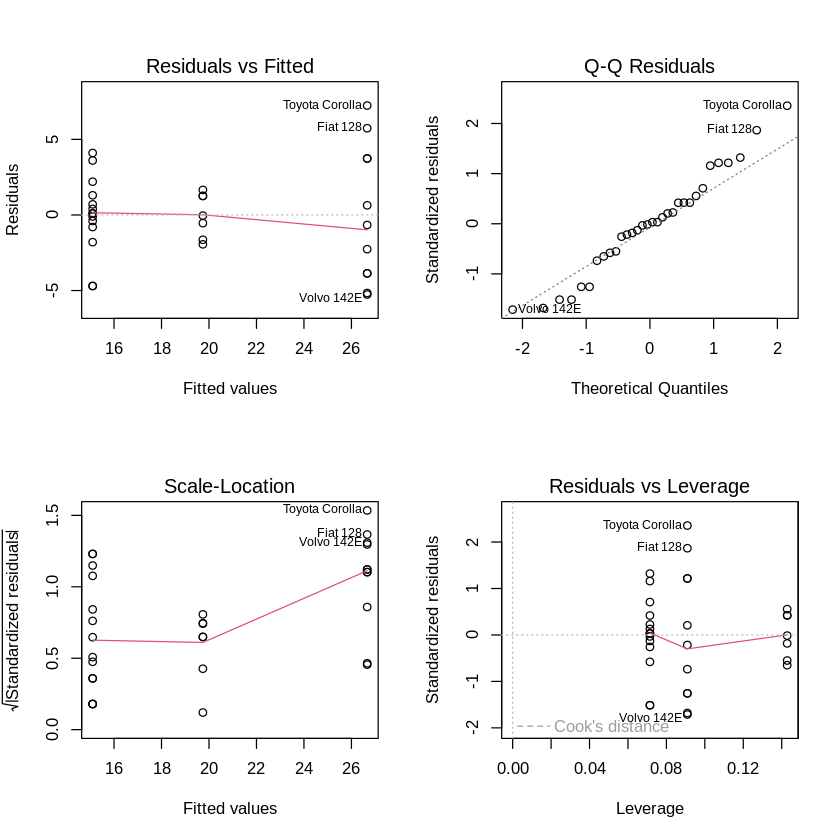

In [ ]:
# Arrange 4 plots in 2x2 grid
par(mfrow = c(2, 2))
plot(anova_model)
par(mfrow = c(1, 1))  # reset layout


### Interpretation:

### Residuals should be randomly scattered around 0

### No clear pattern → variance is roughly constant

### Funnel shape → unequal variance


# Post-hoc test

In [ ]:
# Tukey HSD for all factors
TukeyHSD(anova_model)


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = mpg ~ cyl, data = mtcars)

$cyl
          diff        lwr        upr     p adj
6-4  -6.920779 -10.769350 -3.0722086 0.0003424
8-4 -11.563636 -14.770779 -8.3564942 0.0000000
8-6  -4.642857  -8.327583 -0.9581313 0.0112287


### Interpretation
6 vs 4 cylinders: mpg decreases by ~6.93 → significant

8 vs 4 cylinders: mpg decreases by ~11.56 → highly significant

8 vs 6 cylinders: mpg decreases by ~4.64 → significant

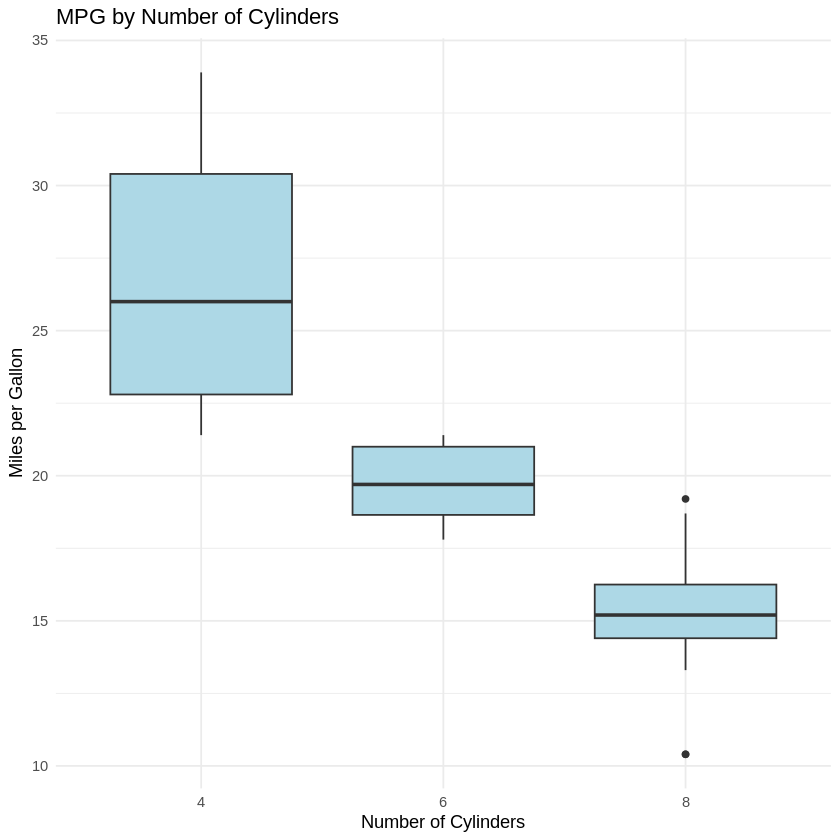

In [ ]:
library(ggplot2)

# Convert cyl to factor
mtcars$cyl <- factor(mtcars$cyl)

# Basic boxplot
ggplot(mtcars, aes(x = cyl, y = mpg)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "MPG by Number of Cylinders",
       x = "Number of Cylinders",
       y = "Miles per Gallon") +
  theme_minimal()


## This visually confirms what Tukey HSD found numerically:

4-cylinder cars (a) → highest mpg

6-cylinder cars (b) → medium mpg

8-cylinder cars (c) → lowest mpg

# Association between cylinder and transmission

## Chi-square test of independence

Appropriate when:

Both variables are categorical

Sample size is large enough

Expected counts in each cell ≥ 5

In [ ]:
table_cyl_am <- table(mtcars$cyl, mtcars$am)
chisq.test(table_cyl_am)$expected


Warning message in chisq.test(table_cyl_am):
“Chi-squared approximation may be incorrect”


,Automatic,Manual
4,6.53125,4.46875
6,4.15625,2.84375
8,8.31250,5.68750


All expected counts > 5? → No (Manual, 8 cylinders = 3.06)

✅ Recommendation: Fisher’s exact test is safer

In [ ]:
fisher.test(table_cyl_am)



	Fisher's Exact Test for Count Data

data:  table_cyl_am
p-value = 0.009105
alternative hypothesis: two.sided


### Conclusion: There is a significant association between number of cylinders and transmission type

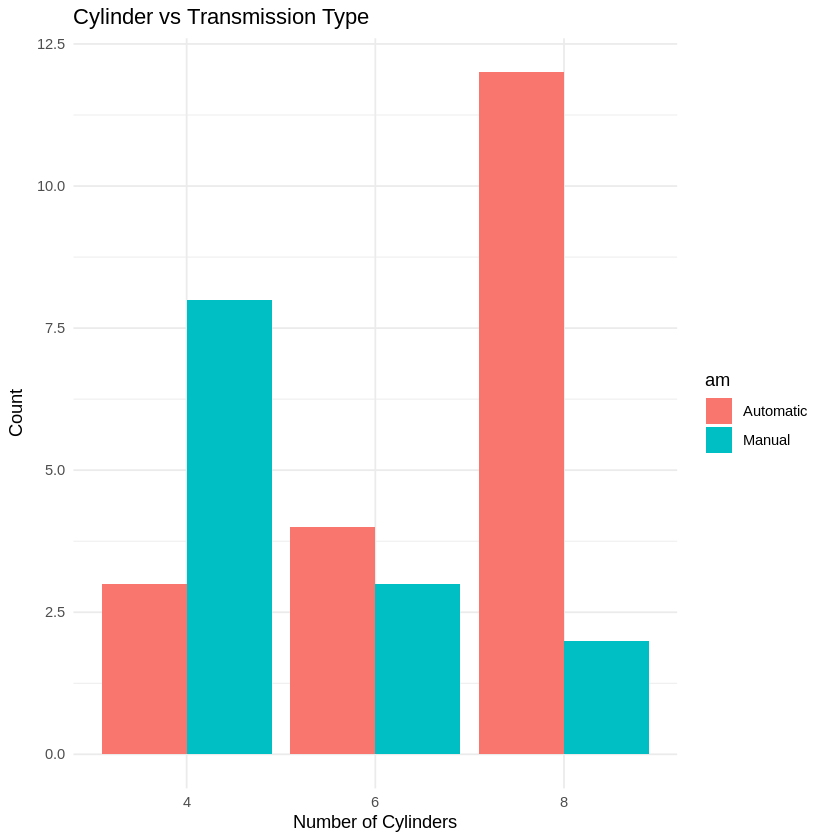

In [ ]:
library(ggplot2)

ggplot(mtcars, aes(x = cyl, fill = am)) +
  geom_bar(position = "dodge") +
  labs(title = "Cylinder vs Transmission Type",
       x = "Number of Cylinders",
       y = "Count") +
  theme_minimal()


## Association between fuel efficiency and horse power

In [ ]:
### Pearson's correlation
cor.test(mtcars$hp, mtcars$mpg)



	Pearson's product-moment correlation

data:  mtcars$hp and mtcars$mpg
t = -6.7424, df = 30, p-value = 1.788e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8852686 -0.5860994
sample estimates:
       cor 
-0.7761684 


### Interpretation

Correlation = -0.776 → strong negative correlation

As horsepower increases, mpg decreases

p-value < 0.001 → correlation is statistically significant

`geom_smooth()` using formula = 'y ~ x'


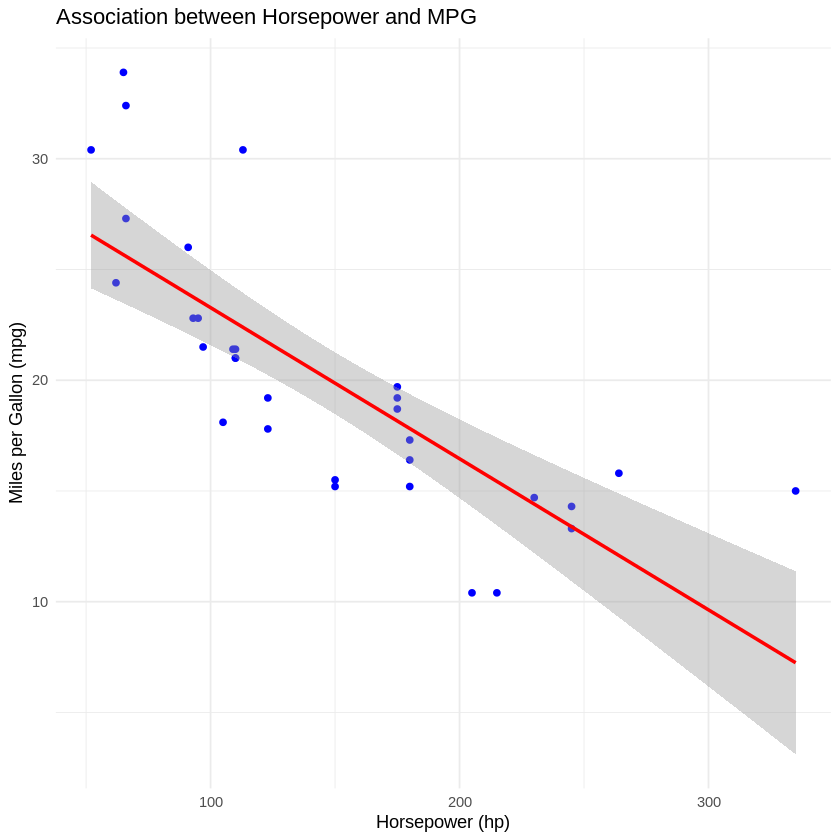

In [ ]:
library(ggplot2)

ggplot(mtcars, aes(x = hp, y = mpg)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  labs(title = "Association between Horsepower and MPG",
       x = "Horsepower (hp)",
       y = "Miles per Gallon (mpg)") +
  theme_minimal()


### Simple linear regression

In [ ]:
# Fit model
lm_model <- lm(mpg ~ hp, data = mtcars)

# Summary
summary(lm_model)


Call:
lm(formula = mpg ~ hp, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7121 -2.1122 -0.8854  1.5819  8.2360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.09886    1.63392  18.421  < 2e-16 ***
hp          -0.06823    0.01012  -6.742 1.79e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.863 on 30 degrees of freedom
Multiple R-squared:  0.6024,	Adjusted R-squared:  0.5892 
F-statistic: 45.46 on 1 and 30 DF,  p-value: 1.788e-07


### Interpretation

Intercept (30.10): Estimated mpg when hp = 0

Slope (-0.068): For each 1 unit increase in horsepower, mpg decreases by 0.068 on average

p = 1.79e-07 < 0.05 → reject null → hp or horse power significantly affects mpg or fuel efficiency.

R² = 0.602: About 60% of the variability in mpg is explained by hp